In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("../data/ACS_16_5YR_C16001/ACS_16_5YR_C16001_with_ann.csv", skiprows=1)

In [6]:
df.index = df['Id2'].astype(str)
del df['Id']
del df['Id2']

In [7]:
df.head()

,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - Speak only English,Margin of Error; Total: - Speak only English,Estimate; Total: - Spanish:,Margin of Error; Total: - Spanish:,"Estimate; Total: - Spanish: - Speak English ""very well""","Margin of Error; Total: - Spanish: - Speak English ""very well""","Estimate; Total: - Spanish: - Speak English less than ""very well""",...,"Estimate; Total: - Arabic: - Speak English ""very well""","Margin of Error; Total: - Arabic: - Speak English ""very well""","Estimate; Total: - Arabic: - Speak English less than ""very well""","Margin of Error; Total: - Arabic: - Speak English less than ""very well""",Estimate; Total: - Other and unspecified languages:,Margin of Error; Total: - Other and unspecified languages:,"Estimate; Total: - Other and unspecified languages: - Speak English ""very well""","Margin of Error; Total: - Other and unspecified languages: - Speak English ""very well""","Estimate; Total: - Other and unspecified languages: - Speak English less than ""very well""","Margin of Error; Total: - Other and unspecified languages: - Speak English less than ""very well"""
Id2,,,,,,,,,,,,,,,,,,,,,
36005000100,"Census Tract 1, Bronx County, New York",7503,365,5393,303,1853,240,319,90,1534,...,0,16,0,16,32,29,0,16,32,29
36005000200,"Census Tract 2, Bronx County, New York",5066,608,1702,488,3137,615,1573,384,1564,...,0,16,0,16,112,96,92,79,20,27
36005000400,"Census Tract 4, Bronx County, New York",5636,426,2587,432,2782,366,1925,319,857,...,0,16,0,16,99,99,78,94,21,33
36005001600,"Census Tract 16, Bronx County, New York",5683,577,1836,382,3116,510,1627,383,1489,...,0,16,0,16,576,410,506,403,70,82
36005001900,"Census Tract 19, Bronx County, New York",2439,264,1118,177,1133,218,683,153,450,...,0,11,0,11,14,16,8,9,6,9


# Exclude unnecessary columns

In [8]:
columns_to_include = []

for i in df.columns:
    if 'Margin of Error' not in i:
        if 'very well' not in i:
            columns_to_include.append(i)

In [10]:
df = df[columns_to_include]

In [11]:
df.head()

,Geography,Estimate; Total:,Estimate; Total: - Speak only English,Estimate; Total: - Spanish:,"Estimate; Total: - French, Haitian, or Cajun:",Estimate; Total: - German or other West Germanic languages:,"Estimate; Total: - Russian, Polish, or other Slavic languages:",Estimate; Total: - Other Indo-European languages:,Estimate; Total: - Korean:,"Estimate; Total: - Chinese (incl. Mandarin, Cantonese):",Estimate; Total: - Vietnamese:,Estimate; Total: - Tagalog (incl. Filipino):,Estimate; Total: - Other Asian and Pacific Island languages:,Estimate; Total: - Arabic:,Estimate; Total: - Other and unspecified languages:
Id2,,,,,,,,,,,,,,,
36005000100,"Census Tract 1, Bronx County, New York",7503,5393,1853,46,7,60,73,0,39,0,0,0,0,32
36005000200,"Census Tract 2, Bronx County, New York",5066,1702,3137,0,0,0,87,28,0,0,0,0,0,112
36005000400,"Census Tract 4, Bronx County, New York",5636,2587,2782,133,0,0,12,2,0,13,0,8,0,99
36005001600,"Census Tract 16, Bronx County, New York",5683,1836,3116,139,0,8,8,0,0,0,0,0,0,576
36005001900,"Census Tract 19, Bronx County, New York",2439,1118,1133,59,14,3,57,0,10,5,0,26,0,14


# Clean up column names

In [12]:
clean_column_names = []

for i in columns_to_include:
    i = i.replace("Estimate;", "").replace("Total: -", "").replace(":", "").strip()
    clean_column_names.append(i)

In [13]:
df.columns = clean_column_names

In [14]:
df.head()

,Geography,Total,Speak only English,Spanish,"French, Haitian, or Cajun",German or other West Germanic languages,"Russian, Polish, or other Slavic languages",Other Indo-European languages,Korean,"Chinese (incl. Mandarin, Cantonese)",Vietnamese,Tagalog (incl. Filipino),Other Asian and Pacific Island languages,Arabic,Other and unspecified languages
Id2,,,,,,,,,,,,,,,
36005000100,"Census Tract 1, Bronx County, New York",7503,5393,1853,46,7,60,73,0,39,0,0,0,0,32
36005000200,"Census Tract 2, Bronx County, New York",5066,1702,3137,0,0,0,87,28,0,0,0,0,0,112
36005000400,"Census Tract 4, Bronx County, New York",5636,2587,2782,133,0,0,12,2,0,13,0,8,0,99
36005001600,"Census Tract 16, Bronx County, New York",5683,1836,3116,139,0,8,8,0,0,0,0,0,0,576
36005001900,"Census Tract 19, Bronx County, New York",2439,1118,1133,59,14,3,57,0,10,5,0,26,0,14


# Convert absolute numbers into percentages

In [15]:
language_cols = [i for i in df.columns if i not in ['Geography']]
languages = df[language_cols].astype(float).fillna(0)
language_percentages = pd.DataFrame()

In [16]:
for i in languages.columns:
    if i != "Total":
        language_percentages[i] = languages[i] / languages['Total']

In [17]:
language_percentages = language_percentages.fillna(0)

In [18]:
language_percentages.head()

,Speak only English,Spanish,"French, Haitian, or Cajun",German or other West Germanic languages,"Russian, Polish, or other Slavic languages",Other Indo-European languages,Korean,"Chinese (incl. Mandarin, Cantonese)",Vietnamese,Tagalog (incl. Filipino),Other Asian and Pacific Island languages,Arabic,Other and unspecified languages
Id2,,,,,,,,,,,,,
36005000100,0.718779,0.246968,0.006131,0.000933,0.007997,0.009729,0.000000,0.005198,0.000000,0.0,0.000000,0.0,0.004265
36005000200,0.335965,0.619226,0.000000,0.000000,0.000000,0.017173,0.005527,0.000000,0.000000,0.0,0.000000,0.0,0.022108
36005000400,0.459013,0.493612,0.023598,0.000000,0.000000,0.002129,0.000355,0.000000,0.002307,0.0,0.001419,0.0,0.017566
36005001600,0.323069,0.548302,0.024459,0.000000,0.001408,0.001408,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.101355
36005001900,0.458385,0.464535,0.024190,0.005740,0.001230,0.023370,0.000000,0.004100,0.002050,0.0,0.010660,0.0,0.005740


# Read in nyc census tracts shapefile

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
nyc_census_tracts = gpd.read_file("../data/nyc_census_tracts/nyc_census_tracts.shp")

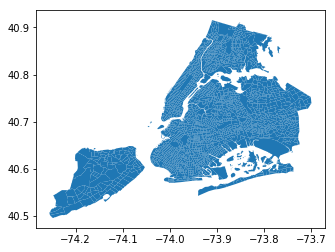

In [42]:
nyc_census_tracts.plot();

In [43]:
nyc_census_tracts.index = nyc_census_tracts['GEOID']

In [44]:
nyc_census_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,MINX,...,CNTY,AREA,PERIM,HEIGHT,WIDTH,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
36059302600,36,059,302600,1400000US36059302600,36059302600,3026,CT,464050,0,913175.10901,...,196483.08745,2.355093e+10,613859.6236,152722.41239,154207.39941,4,Queens,895232.757777,3.044772e+09,POLYGON ((-73.70210251002685 40.73638216704759...
36061001300,36,061,001300,1400000US36061001300,36061001300,13,CT,312732,0,913175.10901,...,196483.08745,2.355093e+10,613859.6236,152722.41239,154207.39941,1,Manhattan,361657.416718,6.366004e+08,"POLYGON ((-74.015513 40.707707, -74.014697 40...."
36061002202,36,061,002202,1400000US36061002202,36061002202,22.02,CT,56112,0,913175.10901,...,196483.08745,2.355093e+10,613859.6236,152722.41239,154207.39941,1,Manhattan,361657.416718,6.366004e+08,"POLYGON ((-73.982964 40.722671, -73.9806070000..."
36061003400,36,061,003400,1400000US36061003400,36061003400,34,CT,160257,0,913175.10901,...,196483.08745,2.355093e+10,613859.6236,152722.41239,154207.39941,1,Manhattan,361657.416718,6.366004e+08,"POLYGON ((-73.984448 40.728781, -73.983543 40...."
36061005501,36,061,005501,1400000US36061005501,36061005501,55.01,CT,124447,0,913175.10901,...,196483.08745,2.355093e+10,613859.6236,152722.41239,154207.39941,1,Manhattan,361657.416718,6.366004e+08,"POLYGON ((-73.998955 40.728068, -73.9978859999..."


In [48]:
joined = pd.merge(nyc_census_tracts[['GEOID', 'geometry']], language_percentages, left_index=True, right_index=True)

In [52]:
joined.columns

Index(['GEOID', 'geometry', 'Speak only English', 'Spanish',
       'French, Haitian, or Cajun', 'German or other West Germanic languages',
       'Russian, Polish, or other Slavic languages',
       'Other Indo-European languages', 'Korean',
       'Chinese (incl. Mandarin, Cantonese)', 'Vietnamese',
       'Tagalog (incl. Filipino)', 'Other Asian and Pacific Island languages',
       'Arabic', 'Other and unspecified languages'],
      dtype='object')

In [50]:
joined.head()

,GEOID,geometry,Speak only English,Spanish,"French, Haitian, or Cajun",German or other West Germanic languages,"Russian, Polish, or other Slavic languages",Other Indo-European languages,Korean,"Chinese (incl. Mandarin, Cantonese)",Vietnamese,Tagalog (incl. Filipino),Other Asian and Pacific Island languages,Arabic,Other and unspecified languages
36005000100,36005000100,(POLYGON ((-73.87097274671088 40.7890576123909...,0.718779,0.246968,0.006131,0.000933,0.007997,0.009729,0.000000,0.005198,0.000000,0.0,0.000000,0.0,0.004265
36005000200,36005000200,"(POLYGON ((-73.865218 40.814529, -73.864255 40...",0.335965,0.619226,0.000000,0.000000,0.000000,0.017173,0.005527,0.000000,0.000000,0.0,0.000000,0.0,0.022108
36005000400,36005000400,"(POLYGON ((-73.85870299999999 40.815405, -73.8...",0.459013,0.493612,0.023598,0.000000,0.000000,0.002129,0.000355,0.000000,0.002307,0.0,0.001419,0.0,0.017566
36005001600,36005001600,"POLYGON ((-73.862464 40.819247, -73.861531 40....",0.323069,0.548302,0.024459,0.000000,0.001408,0.001408,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.101355
36005001900,36005001900,"(POLYGON ((-73.930938 40.808253, -73.929219 40...",0.458385,0.464535,0.024190,0.005740,0.001230,0.023370,0.000000,0.004100,0.002050,0.0,0.010660,0.0,0.005740


In [51]:
joined.to_file("../data/nyc_census_tracts_language")

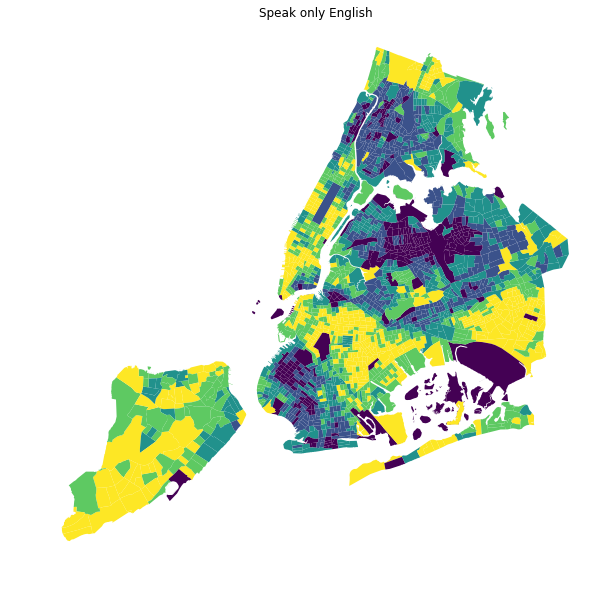

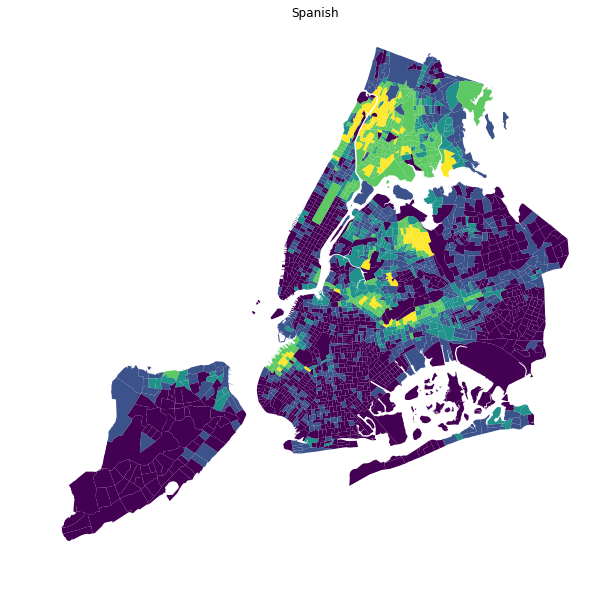

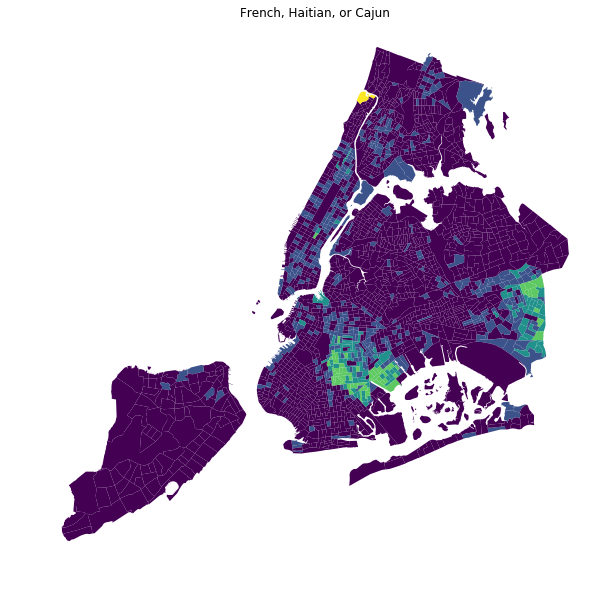

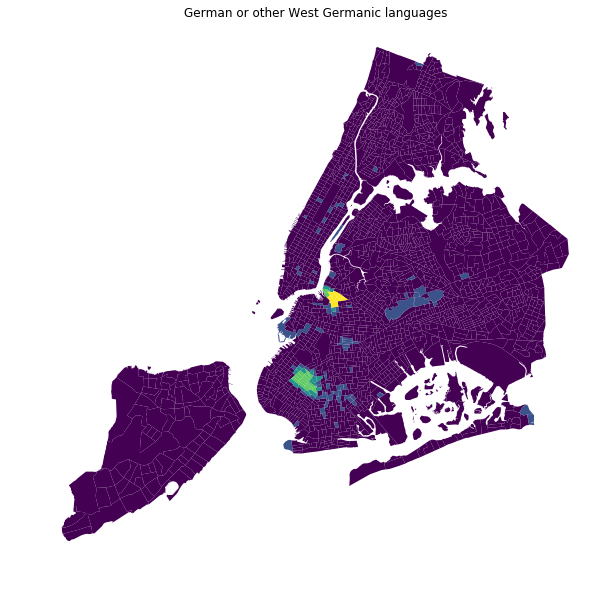

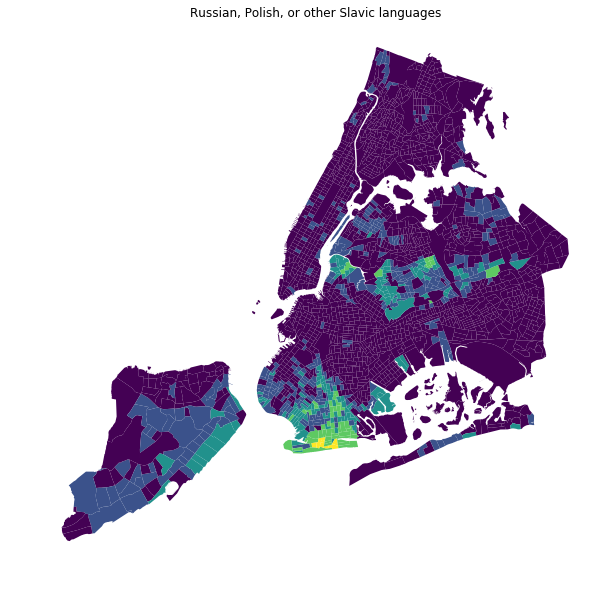

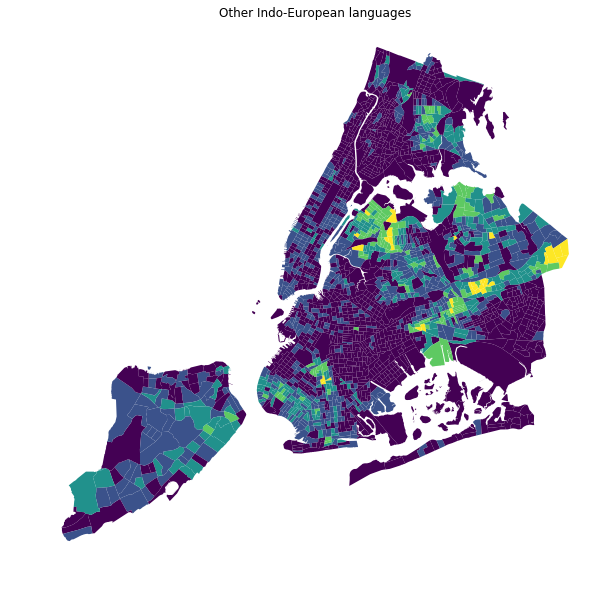

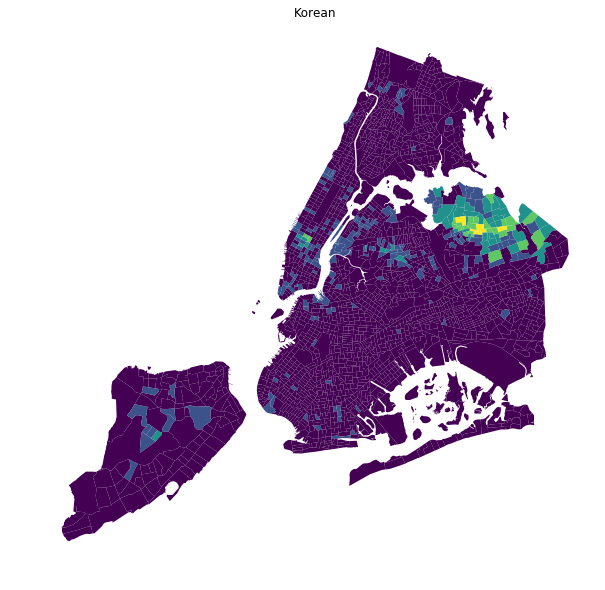

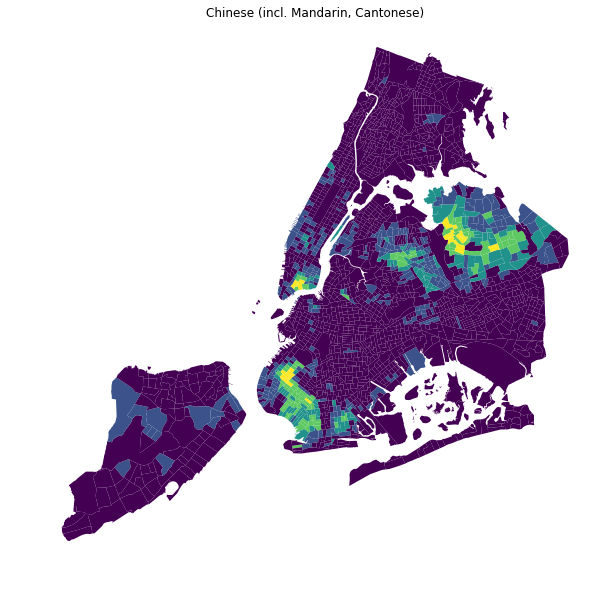

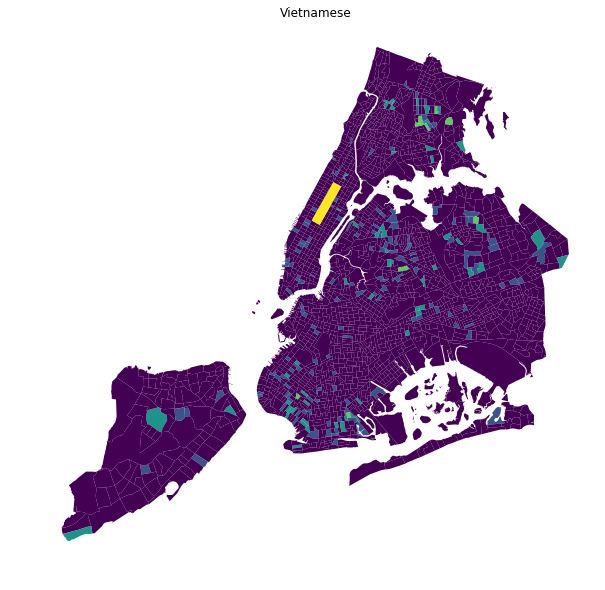

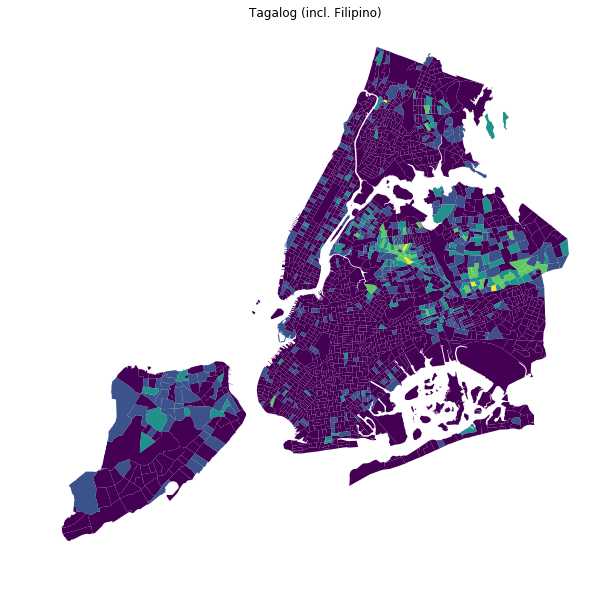

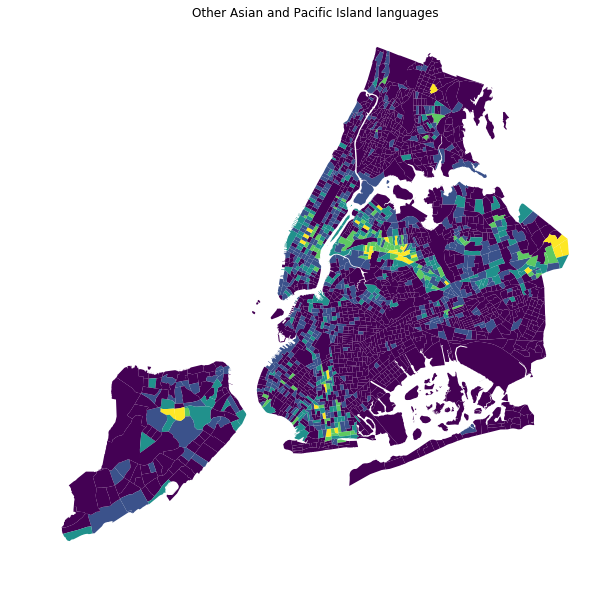

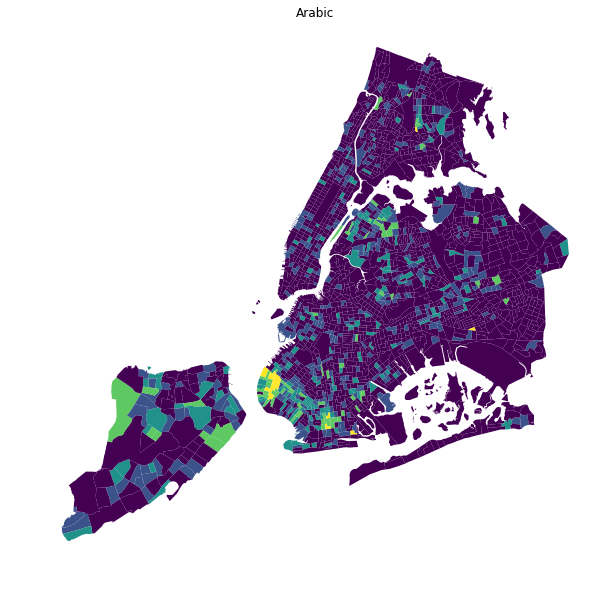

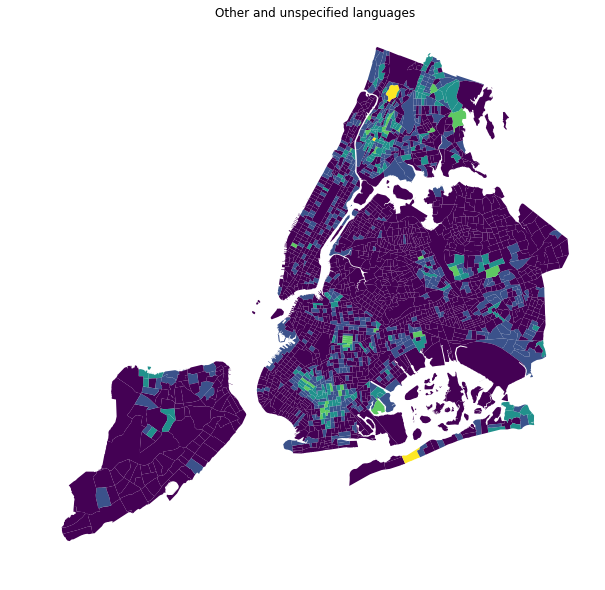

In [46]:
for i in language_cols:
    if i != 'Total':
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_axis_off()
        joined.plot(column=i, ax=ax, scheme='fisher_jenks')
        plt.title(i);